In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing as TES
from sklearn.metrics import mean_squared_error
from data.read_data import read_data
from data import COVID
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = read_data(COVID)
df['days_out'] = df.apply(lambda row: pd.to_datetime(row.Activated) - pd.to_datetime(row.Deactivated), axis=1)
ts = pd.DataFrame(columns={'health'})
ts.health = np.concatenate((np.ones(6),np.zeros(df.days_out.iloc[0].days),np.linspace(.1,1,5),np.ones(10)))
ts = ts.append(pd.DataFrame(np.concatenate((np.ones(3),np.zeros(7),np.linspace(.1,1,9),np.ones(10))).T, columns={'health'}))
ts = ts.append(pd.DataFrame(np.concatenate((np.ones(3),np.zeros(7),np.linspace(.1,1,6),np.ones(1))).T, columns={'health'}))
ts.index = pd.date_range('2020-03-10', freq='D', periods=len(ts))
ts

,health
2020-03-10,1.00
2020-03-11,1.00
2020-03-12,1.00
2020-03-13,1.00
2020-03-14,1.00
...,...
2020-05-15,0.46
2020-05-16,0.64
2020-05-17,0.82
2020-05-18,1.00


In [4]:
train_df = ts[:-5]
test_df = ts[-5:]

In [24]:
model = TES(train_df, seasonal_periods=22)
model.fit(smoothing_level=.1)
pred = model.predict(model.params, start=0, end=4)
print(f'Mean Squared Error: {mean_squared_error(test_df.health, pred)}')

Mean Squared Error: 0.031235704570154222


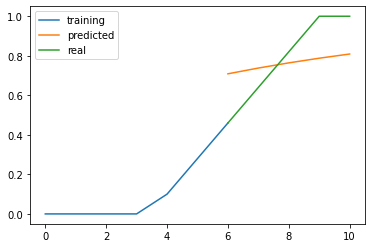

In [23]:
plt.plot(range(7), np.concatenate((train_df.health.values[-6:],[test_df.health[0]])), label='training')
plt.plot(range(6, 6 + len(test_df)), pred, label='predicted')
plt.plot(range(6, 6 + len(test_df)), test_df.health.values, label='real')
plt.legend()
plt.show()